In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("bank-full.csv", delimiter=";")

In [3]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
for col in df.columns:
    print(col, df[col].unique())

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [ 2143    29     2 ...  8205 14204 16353]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [ 261  151   76 ... 1298 1246 1556]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

In [5]:
df["job"].replace({"admin.": "admin"}, inplace=True)


C:\Users\binar\AppData\Local\Temp\ipykernel_19428\1340768125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace({"admin.": "admin"}, inplace=True)


In [6]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [8]:
for data in df.duplicated():
  if data==True:
    print(data)
    df.drop_duplicates(inplace=True)

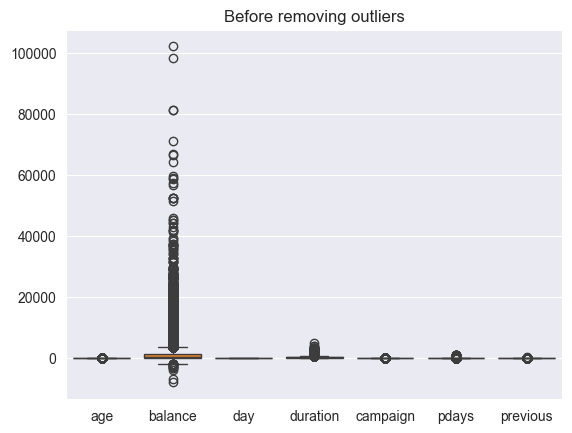

In [727]:
sns.boxplot(df)
plt.title("Before removing outliers")
plt.show()

Transferting categorical variables using one hot encoding and label encoding

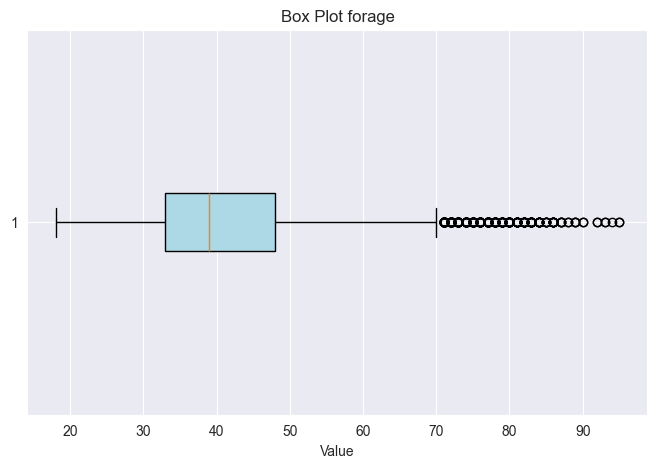

Skipping boxplot for column 'job' as it is not numeric.
Skipping boxplot for column 'marital' as it is not numeric.
Skipping boxplot for column 'education' as it is not numeric.
Skipping boxplot for column 'default' as it is not numeric.


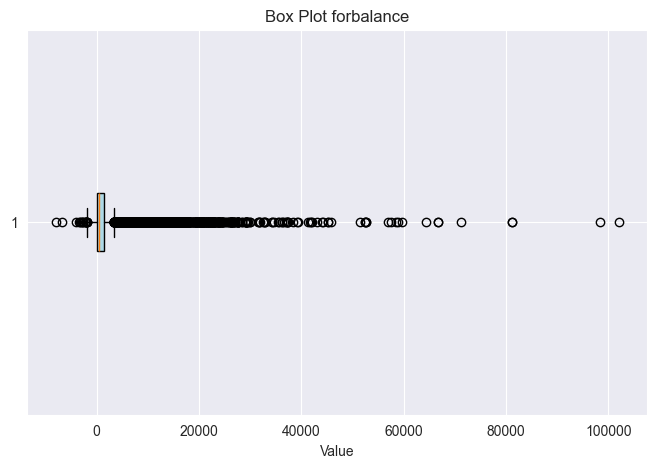

Skipping boxplot for column 'housing' as it is not numeric.
Skipping boxplot for column 'loan' as it is not numeric.
Skipping boxplot for column 'contact' as it is not numeric.


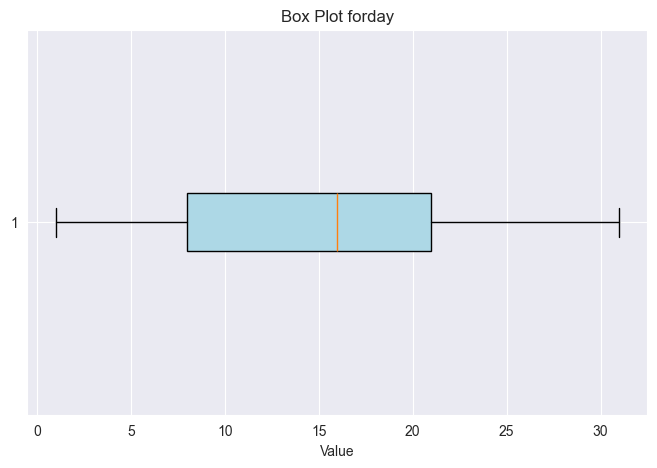

Skipping boxplot for column 'month' as it is not numeric.


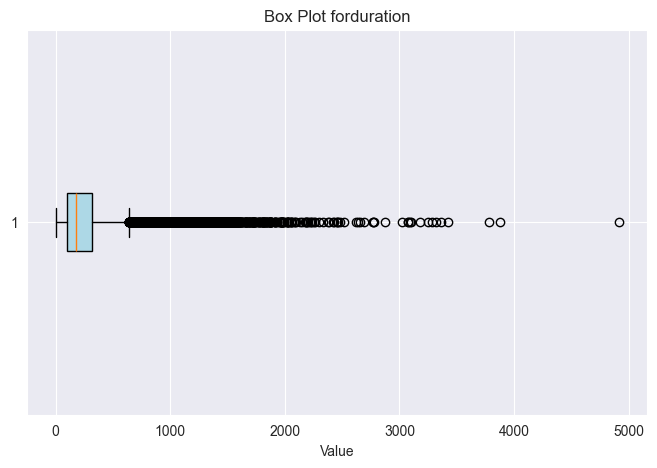

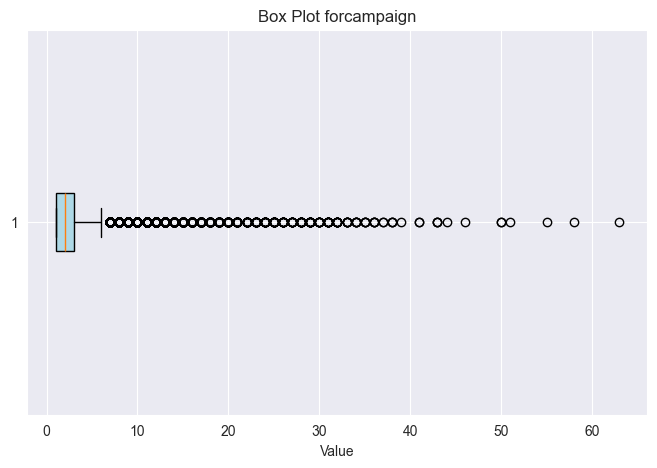

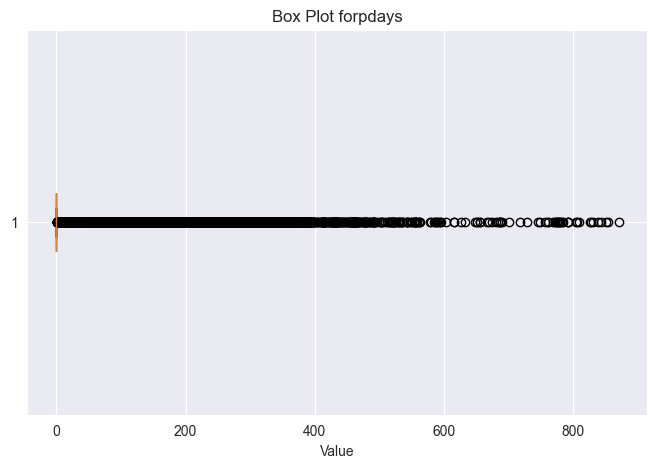

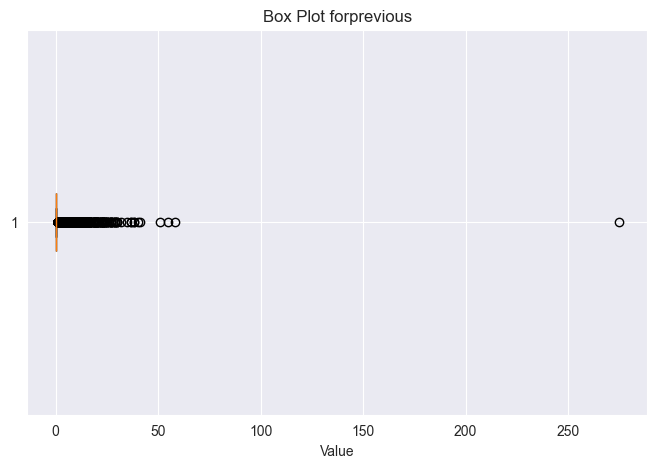

Skipping boxplot for column 'poutcome' as it is not numeric.
Skipping boxplot for column 'y' as it is not numeric.


In [9]:
# Loop through columns, but exclude the 'Date' column (or other non-numeric columns)
for col in df.columns:
    if df[col].dtype in [int, float]:  # Check if the column's data type is numeric
        plt.figure(figsize=(8, 5))
        plt.boxplot(df[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
        plt.title("Box Plot for"+ col)
        plt.xlabel("Value")
        plt.show() # Add plt.show() to display each boxplot individually
    else:
        print(f"Skipping boxplot for column '{col}' as it is not numeric.")

In [10]:
# Calculate IQR thresholds
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['age'] = df['age'].clip(lower=lower_bound, upper=upper_bound)



In [11]:
# Calculate IQR thresholds
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['balance'] = df['balance'].clip(lower=lower_bound, upper=upper_bound)




In [12]:
# Calculate IQR thresholds
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values
df['campaign'] = df['campaign'].clip(lower=lower_bound, upper=upper_bound)


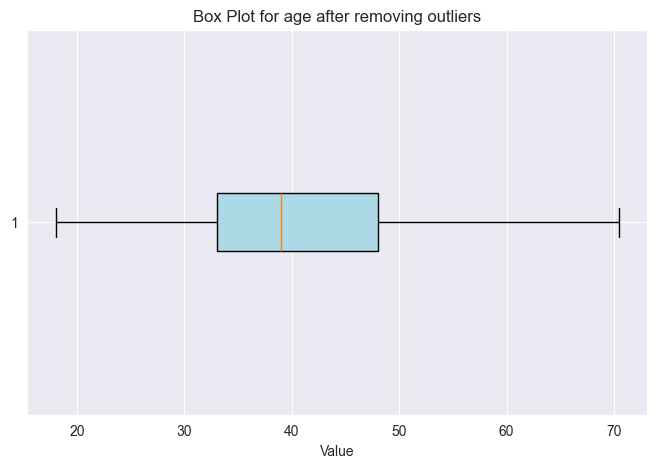

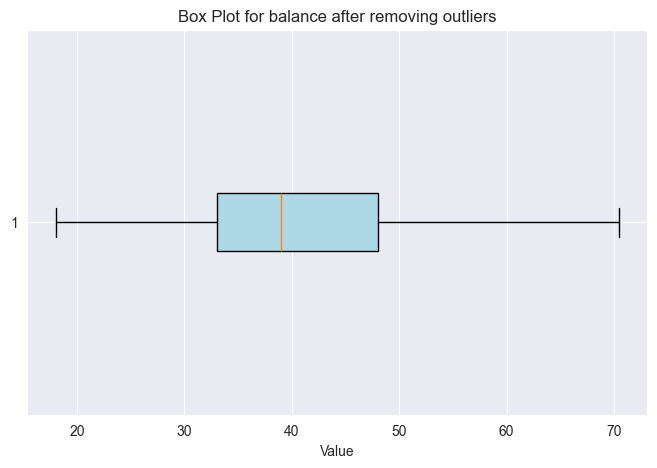

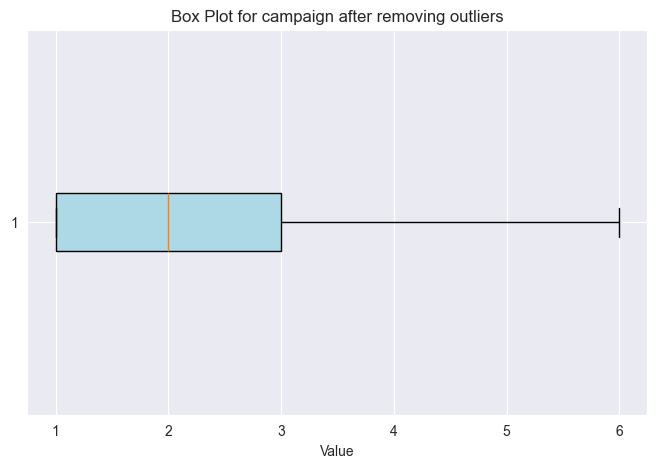

In [13]:
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for age after removing outliers")
plt.xlabel("Value")
plt.show()
plt.figure(figsize=(8, 5))
plt.boxplot(df['age'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for balance after removing outliers")
plt.xlabel("Value")
plt.show()
plt.figure(figsize=(8, 5))
plt.boxplot(df['campaign'], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Box Plot for campaign after removing outliers")
plt.xlabel("Value")
plt.show()

In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [15]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [735]:
df.to_csv("Delimeted_Dataset.csv")

In [736]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [710]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [16]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_encoder = LabelEncoder()

month_mapping = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12
}

df['month'] = df['month'].str.lower().map(month_mapping)

df['education'] = label_encoder.fit_transform(df['education'])



df['y'] = df['y'].map({'yes': 1, 'no': 0})


nominal_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'poutcome']
df = pd.get_dummies(df, columns=nominal_features)
df=df.astype(int)


In [738]:
df.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,y,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,261,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,151,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,76,1,-1,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,92,1,-1,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,198,1,-1,0,0,...,0,1,0,0,0,1,0,0,0,1


In [713]:
df["month"].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9])

In [17]:
Pearson_Correlation = df.corr(method='pearson')


for col in Pearson_Correlation.columns:
    for index in Pearson_Correlation.index:
        if Pearson_Correlation.loc[index, col] > 0.9 and index != col:
            print(f"{index} and {col}: {Pearson_Correlation.loc[index, col]}")


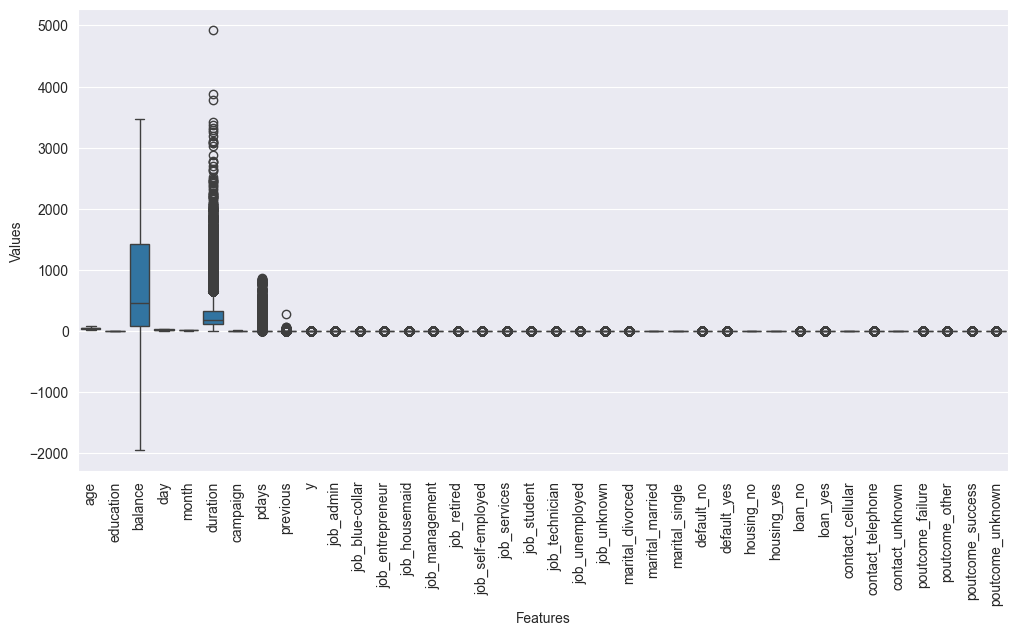

In [18]:
df_melted = df.melt(var_name="Features", value_name="Values")


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="Features", y="Values")
plt.xticks(rotation=90)
plt.show()

In [19]:
df.drop('duration', axis=1, inplace=True)

In [742]:
df.head()

,age,education,balance,day,month,campaign,pdays,previous,y,job_admin,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2,2143,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,44,1,29,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,33,1,2,5,5,1,-1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,47,3,1506,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,33,3,1,5,5,1,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


              Feature  Importance
2             balance    0.176662
0                 age    0.156820
3                 day    0.140263
4               month    0.094741
5            campaign    0.057323
34   poutcome_success    0.053656
6               pdays    0.050040
1           education    0.038922
7            previous    0.025964
17     job_technician    0.013505
12     job_management    0.013054
25         housing_no    0.012919
26        housing_yes    0.012220
8           job_admin    0.011604
9     job_blue-collar    0.010808
21    marital_married    0.010675
29   contact_cellular    0.009706
22     marital_single    0.009611
32   poutcome_failure    0.009075
15       job_services    0.008574
31    contact_unknown    0.007959
20   marital_divorced    0.007919
28           loan_yes    0.007335
27            loan_no    0.007112
35   poutcome_unknown    0.007013
14  job_self-employed    0.006189
18     job_unemployed    0.006067
13        job_retired    0.006047
16        job_

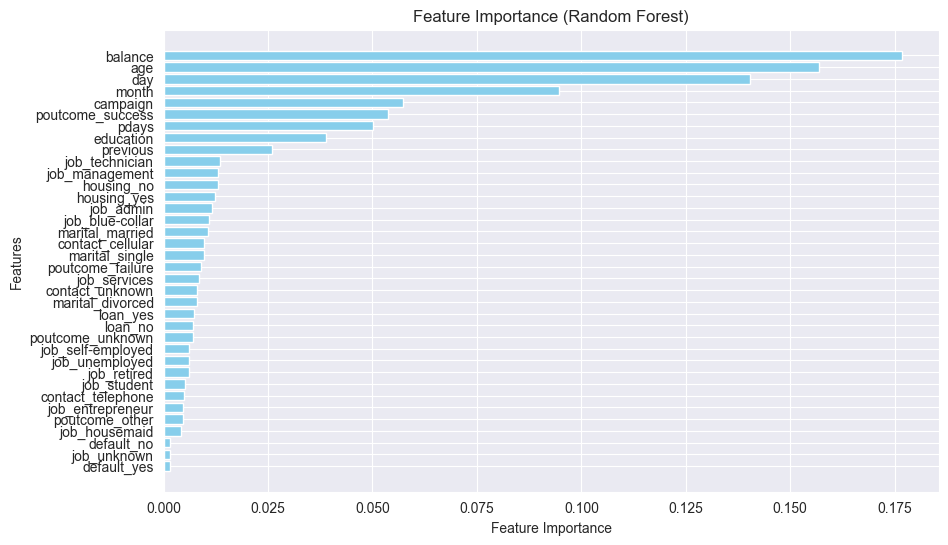

In [20]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

x_train=df.drop(columns=['y'])
y_train=df['y']

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


feature_importances = rf.feature_importances_


features = x_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)


print(importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [21]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['age','balance']
scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])


df.head()

,age,education,balance,day,month,campaign,pdays,previous,y,job_admin,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.769231,2,0.756822,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
1,0.500000,1,0.367072,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,0.288462,1,0.362094,5,5,1,-1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,0.557692,3,0.639381,5,5,1,-1,0,0,0,...,1,1,0,0,0,1,0,0,0,1
4,0.288462,3,0.361910,5,5,1,-1,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [22]:
from sklearn.decomposition import PCA



X=df.drop(["y","balance","age","day","month","campaign","poutcome_success","pdays","education","previous"],axis=1)


pca = PCA(0.95)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:",explained_variance)
pca_columns = X_pca[:, :7]
pca_data = np.concatenate([pca_columns], axis=1)
pca_df = pd.DataFrame(pca_data, columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
pca_df.head()
new_df=pd.concat([df.iloc[:,0:10], pca_df],axis=1)
new_df.head()



Explained Variance Ratio: [0.18981477 0.13831587 0.13047211 0.09053255 0.06708059 0.06078986
 0.05897695 0.05010306 0.04417418 0.03361862 0.02930404 0.01896055
 0.01884189 0.01404131 0.01182015]


,age,education,balance,day,month,campaign,pdays,previous,y,job_admin,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7
0,0.769231,2,0.756822,5,5,1,-1,0,0,0,-0.977435,0.490974,-0.169525,-0.370608,0.931344,-0.254142,-0.108786
1,0.500000,1,0.367072,5,5,1,-1,0,0,0,-0.846006,-0.540116,-1.107939,-0.091377,-0.069491,0.645389,-0.299522
2,0.288462,1,0.362094,5,5,1,-1,0,0,0,-1.143216,0.589516,-0.002114,1.109814,0.251700,-0.020617,-0.261821
3,0.557692,3,0.639381,5,5,1,-1,0,0,0,-1.247110,0.619359,-0.125332,-0.306701,-0.382120,-0.258093,0.275624
4,0.288462,3,0.361910,5,5,1,-1,0,0,0,0.268562,0.149515,-1.509453,-0.077746,-0.175880,-0.182524,-0.176405


In [23]:
new_df.isnull().sum()

age          0
education    0
balance      0
day          0
month        0
campaign     0
pdays        0
previous     0
y            0
job_admin    0
PCA1         0
PCA2         0
PCA3         0
PCA4         0
PCA5         0
PCA6         0
PCA7         0
dtype: int64

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV




X = new_df.drop(["y"], axis=1)
Y = new_df["y"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [200,250,300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [10,15,20],
    'min_samples_leaf': [5,10,15],
    'max_features': ['sqrt','log2'],
}



random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,
    cv=3,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, Y_train)
print("Best Hyperparameters: ", random_search.best_params_)






Best Hyperparameters:  {'n_estimators': 200, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': None}


In [42]:

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, Y_train)

print("Class distribution after SMOTETomek:", Counter(y_resampled))


rf = RandomForestClassifier(min_samples_leaf=10,n_estimators=200,min_samples_split=15,max_features="log2",class_weight='balanced',random_state=42)
rf.fit(X_resampled, y_resampled)

y_train_pred = rf.predict(X_resampled)
training_accuracy = accuracy_score(y_resampled, y_train_pred)
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


y_val_pred = rf.predict(X_test)
validation_accuracy = accuracy_score(Y_test, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")

y_prob = rf.predict_proba(X_test)[:, 1]
threshold = 0.4  # Custom threshold
y_pred = (y_prob > threshold).astype(int)

print(classification_report(Y_test, y_pred))


Class distribution after SMOTETomek: Counter({0: 31672, 1: 31672})
Training Accuracy: 93.06%
Validation Accuracy: 86.76%
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7952
           1       0.37      0.48      0.41      1091

    accuracy                           0.84      9043
   macro avg       0.65      0.68      0.66      9043
weighted avg       0.86      0.84      0.85      9043



In [45]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
scores = cross_val_score(rf, X, Y, cv=stratified_kfold, scoring='f1_macro')
print("Stratified Cross-Validation F1-Scores:", scores)
print("Mean F1-Score:", scores.mean())


Stratified Cross-Validation F1-Scores: [0.60500915 0.61399426 0.61218628 0.60109407 0.63254837]
Mean F1-Score: 0.6129664248344693


1, trainng Loss: 0.3485, val Loss: 0.3334
2, trainng Loss: 0.3325, val Loss: 0.3175
3, trainng Loss: 0.3270, val Loss: 0.3159
4, trainng Loss: 0.3224, val Loss: 0.3160
5, trainng Loss: 0.3208, val Loss: 0.3189
6, trainng Loss: 0.3187, val Loss: 0.3176
7, trainng Loss: 0.3206, val Loss: 0.3285
8, trainng Loss: 0.3175, val Loss: 0.3107
9, trainng Loss: 0.3167, val Loss: 0.3101
10, trainng Loss: 0.3141, val Loss: 0.3195


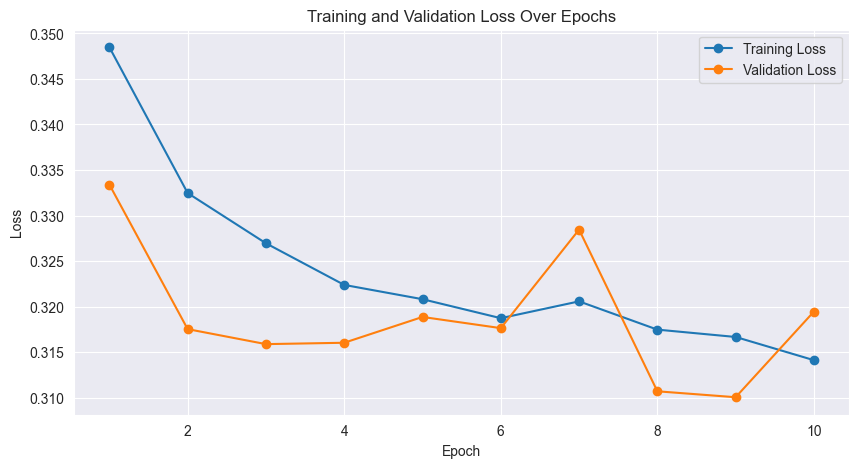

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12002
           1       0.53      0.19      0.28      1562

    accuracy                           0.89     13564
   macro avg       0.72      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [46]:
import torch
from torch.utils.data import DataLoader, random_split, TensorDataset
import torch.nn as nn
import torch.optim as optim


input = torch.tensor(new_df.drop(columns=['y']).values, dtype=torch.float32)
target = torch.tensor(new_df['y'].values, dtype=torch.long)


dataset = TensorDataset(input, target)
train_dataset, val_dataset = random_split(dataset, [int(0.7 * len(df)), len(df) - int(0.7 * len(df))])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

input_size = input.shape[1]


model = nn.Sequential(
    nn.Linear(input_size, 32),
    nn.ReLU(),
    nn.Linear(32, 2)
)


loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    training_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = loss_function(outputs, targets)
            val_loss += loss.item()
    val_loss /= len(val_loader)
    validation_losses.append(val_loss)

    print(f"{epoch + 1}, trainng Loss: {train_loss:.4f}, val Loss: {val_loss:.4f}")


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

y_pred = []
y_val = []
model.eval()
with torch.no_grad():
    for inputs, targets in val_loader:
        outputs = model(inputs)
        y_pred.append(torch.argmax(outputs, dim=1))
        y_val.append(targets)

y_pred = torch.cat(y_pred)
y_val = torch.cat(y_val)

print(classification_report(y_val.numpy(), y_pred.numpy()))
